In [115]:
#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [91]:
#loading the data
df=pd.read_csv('../input/chocolate-bar-ratings/flavors_of_cacao.csv')
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


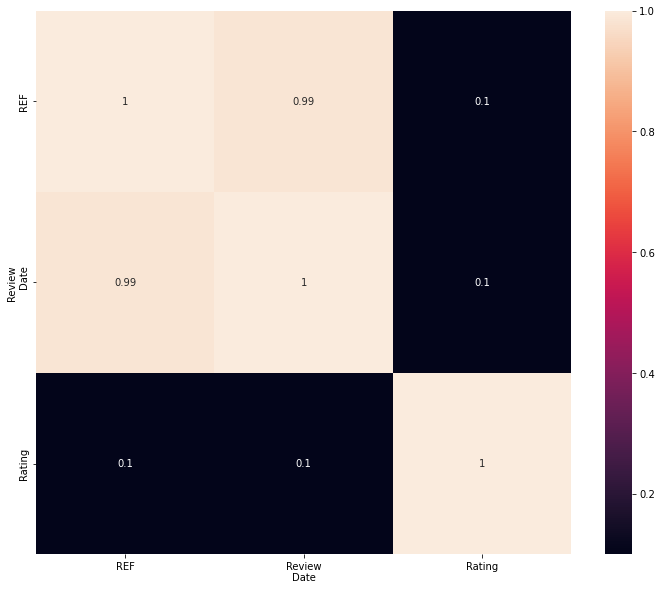

In [92]:
#ploting the correlation betweeen rating and other features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [93]:
#droping the column with no corelation
df=df.drop(['REF','Review\nDate'],axis=1)

In [94]:
#checking for the null value in the data set
df.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [95]:
#dropping the null value from the row
df=df.dropna(axis=0)

In [96]:
#checking the data types for the dataset
df.dtypes


Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [97]:
#creating a function to remove percent
def removePercents(data):
    return data.apply(lambda x:float(x.strip('%'))/100)

In [98]:
#renaming the column with correct name
df.columns=['Company','SpecificOrigin','CocoaPercent','Location',
           'Rating','BeanType','BroadOrigin']

In [99]:
#removing percent and converting string to float
df['CocoaPercent']=removePercents(df['CocoaPercent'])

In [100]:
df

,Company,SpecificOrigin,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,0.70,France,2.75,,Togo
2,A. Morin,Atsane,0.70,France,3.00,,Togo
3,A. Morin,Akata,0.70,France,3.50,,Togo
4,A. Morin,Quilla,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...
1790,Zotter,Peru,0.70,Austria,3.75,,Peru
1791,Zotter,Congo,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,0.62,Austria,3.25,,India


In [101]:
#checking the length of unique list in the column
len(df['SpecificOrigin'].unique())

1038

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1793 non-null   object 
 1   SpecificOrigin  1793 non-null   object 
 2   CocoaPercent    1793 non-null   float64
 3   Location        1793 non-null   object 
 4   Rating          1793 non-null   float64
 5   BeanType        1793 non-null   object 
 6   BroadOrigin     1793 non-null   object 
dtypes: float64(2), object(5)
memory usage: 112.1+ KB


In [103]:
#selecting the column with categorical features
categorical_features=['Company','SpecificOrigin','Location','BeanType','BroadOrigin']

In [104]:
#creating function to one hot encode
def onehot_encode(df,columns):
    for column in columns:
        dummies=pd.get_dummies(df[column])
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [105]:
#implementing the function
df=onehot_encode(df,categorical_features)

In [106]:
#getting the data
df

,CocoaPercent,Rating,A. Morin,AMMA,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),Alain Ducasse,...,Venezuela,"Venezuela, Carribean","Venezuela, Dom. Rep.","Venezuela, Ghana","Venezuela, Java","Venezuela, Trinidad",Venezuela/ Ghana,Vietnam,West Africa,
0,0.63,3.75,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.70,2.75,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.70,3.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.70,3.50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.70,3.50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,0.70,3.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1791,0.65,3.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1792,0.65,3.50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1793,0.62,3.25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
#Spliting the data
y=df['Rating']
x=df.drop('Rating',axis=1)

In [108]:
#scaling the data
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [109]:
x

,CocoaPercent,A. Morin,AMMA,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),Alain Ducasse,Alexandre,...,Venezuela,"Venezuela, Carribean","Venezuela, Dom. Rep.","Venezuela, Ghana","Venezuela, Java","Venezuela, Trinidad",Venezuela/ Ghana,Vietnam,West Africa,
0,0.362069,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.482759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1789,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1790,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,0.344828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
#Training the Model
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=True)

In [116]:
inputs=tf.keras.Input(shape=(1655,))
x=tf.keras.layers.Dense(16,activation='relu')(inputs)
x=tf.keras.layers.Dense(16,activation='relu')(x)
outputs=tf.keras.layers.Dense(1)(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)




User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

In [121]:
optimizer=tf.keras.optimizers.RMSprop(0.001)
model.compile(
    optimizer=optimizer,
    loss='mse')

In [122]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1655)]            0         
_________________________________________________________________
dense (Dense)                (None, 16)                26496     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 26,785
Trainable params: 26,785
Non-trainable params: 0
_________________________________________________________________


In [127]:
epochs=11
batch_size=32
history=model.fit(
    x_train,y_train,validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1)

Epoch 1/11
32/32 [==============================] - 0s 4ms/step - loss: 0.0210 - val_loss: 0.2846
Epoch 2/11
32/32 [==============================] - 0s 4ms/step - loss: 0.0212 - val_loss: 0.2913
Epoch 3/11
32/32 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.3107
Epoch 4/11
32/32 [==============================] - 0s 3ms/step - loss: 0.0204 - val_loss: 0.3003
Epoch 5/11
32/32 [==============================] - 0s 3ms/step - loss: 0.0194 - val_loss: 0.3012
Epoch 6/11
32/32 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.3022
Epoch 7/11
32/32 [==============================] - 0s 3ms/step - loss: 0.0194 - val_loss: 0.3033
Epoch 8/11
32/32 [==============================] - 0s 4ms/step - loss: 0.0187 - val_loss: 0.3322
Epoch 9/11
32/32 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.2985
Epoch 10/11
32/32 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.2996
Epoch 11/11
32/32 [

In [128]:
history.history

{'loss': [0.021041132509708405,
  0.02115732431411743,
  0.020655842497944832,
  0.02036140486598015,
  0.019416088238358498,
  0.019871719181537628,
  0.01943298429250717,
  0.01873110607266426,
  0.019390564411878586,
  0.020088380202651024,
  0.017843862995505333],
 'val_loss': [0.2846159338951111,
  0.2913297414779663,
  0.3107356131076813,
  0.30029240250587463,
  0.30123814940452576,
  0.3022233843803406,
  0.3033197224140167,
  0.33224406838417053,
  0.29854822158813477,
  0.29963362216949463,
  0.3028707802295685]}

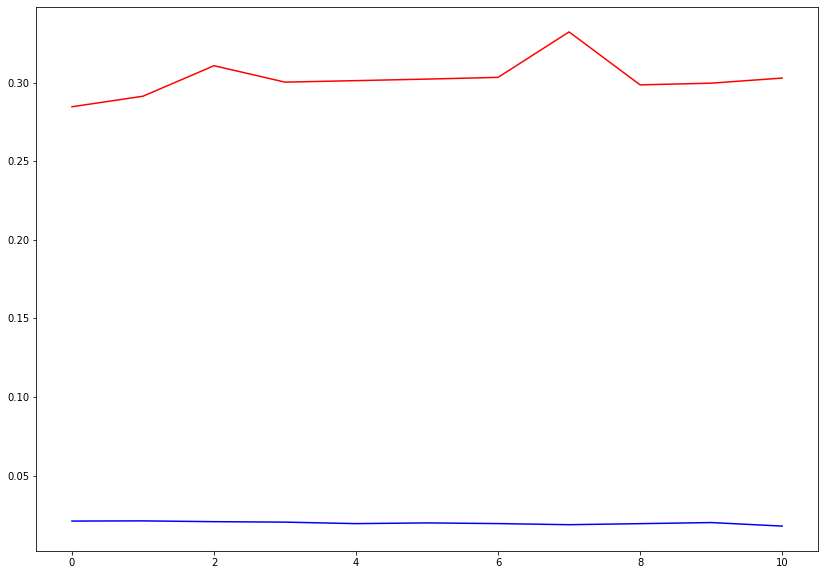

In [129]:
plt.figure(figsize=(14,10))
plt.plot(range(epochs),history.history['loss'],color='b')
plt.plot(range(epochs),history.history['val_loss'],color='r')
plt.show()


In [126]:
np.argmin(history.history['val_loss'])

11

In [130]:
#evaluating the model
model.evaluate(x_test,y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.3365


0.33651623129844666